In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [3]:
import random

In [4]:
#define class kmeans

class Kmeans :
    def __init__(self , n_clusters = 2 , num_of_iterations = 300):
        self.n_clusters = n_clusters
        self.iterations = num_of_iterations
        self.centroid = None
        self.inertia_ = None
        
    def assign_clusters(self,X):
        cluster_group = []
        temp = []
        for row in X:
            for c in self.centroid:
                temp.append(np.sqrt(np.dot(row - c , row - c)))         #will append the eucledian distances of point from the centroid
                
            cluster_group.append(temp.index(min(temp)))
            temp.clear()
            
        return cluster_group
    
    def move_centroids(self , X , cluster_group):
        
        new_centroid = []
        cluster_type = np.unique(cluster_group)
        
        for cluster in cluster_type:
            new_centroid.append(X[cluster_group == cluster].mean(axis = 0))
            
        return np.array(new_centroid)
    
        
    def fit_predict(self,X):
        # Assign centroid
        self.centroid = X[random.sample(range(0 , X.shape[0]) , self.n_clusters)]
        
        #run your rest of the process through iterations
        for i in range(self.iterations):
            #Assign clusters
            cluster_group = self.assign_clusters(X)
            
            #Move centroids
            old_centroids = self.centroid
            self.centroid = self.move_centroids(X , cluster_group)
                        
            #check condition
            if(old_centroids == self.centroid).all():
                break
                
        ## finding inertia
        cluster_type = np.unique(cluster_group)
        self.inertia_ = 0
        for cluster in cluster_type:
            c = self.centroid[cluster]
            for row in X[cluster_group == cluster]:
                self.inertia_ += np.sqrt(np.dot(row - c , row - c))
                
        ##ending finding inertia
                
        
        return np.array(cluster_group)
    
    
    
            

In [5]:
df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
from sklearn.preprocessing import OneHotEncoder
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(df[categorical_columns])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))
df_encoded = pd.concat([df, one_hot_df], axis=1)
df_encoded = df_encoded.drop(categorical_columns, axis=1)

test = df_encoded.drop(columns = ['CustomerID'] , axis = 0)
main_df = pd.DataFrame(test).to_numpy()

In [7]:
main_df

array([[ 19.,  15.,  39.,   0.,   1.],
       [ 21.,  15.,  81.,   0.,   1.],
       [ 20.,  16.,   6.,   1.,   0.],
       [ 23.,  16.,  77.,   1.,   0.],
       [ 31.,  17.,  40.,   1.,   0.],
       [ 22.,  17.,  76.,   1.,   0.],
       [ 35.,  18.,   6.,   1.,   0.],
       [ 23.,  18.,  94.,   1.,   0.],
       [ 64.,  19.,   3.,   0.,   1.],
       [ 30.,  19.,  72.,   1.,   0.],
       [ 67.,  19.,  14.,   0.,   1.],
       [ 35.,  19.,  99.,   1.,   0.],
       [ 58.,  20.,  15.,   1.,   0.],
       [ 24.,  20.,  77.,   1.,   0.],
       [ 37.,  20.,  13.,   0.,   1.],
       [ 22.,  20.,  79.,   0.,   1.],
       [ 35.,  21.,  35.,   1.,   0.],
       [ 20.,  21.,  66.,   0.,   1.],
       [ 52.,  23.,  29.,   0.,   1.],
       [ 35.,  23.,  98.,   1.,   0.],
       [ 35.,  24.,  35.,   0.,   1.],
       [ 25.,  24.,  73.,   0.,   1.],
       [ 46.,  25.,   5.,   1.,   0.],
       [ 31.,  25.,  73.,   0.,   1.],
       [ 54.,  28.,  14.,   1.,   0.],
       [ 29.,  28.,  82.,

In [8]:
wcss = []

for i in range(1,21):
    km = Kmeans(n_clusters=i , num_of_iterations=500)
    km.fit_predict(main_df)
    wcss.append(km.inertia_)

In [9]:
wcss

[7118.477043022499,
 6025.374778822533,
 5021.292782390943,
 4097.4666722352,
 3556.7553527159976,
 3500.5833814722505,
 2984.283232760726,
 2873.0750123402836,
 2780.0124699864973,
 2557.818122226555,
 2587.8117907988385,
 2604.608761672177,
 2283.7953721756194,
 2235.713590301607,
 2282.9216154404494,
 2102.565711209846,
 2112.6158164722533,
 1953.779808757119,
 1968.798451969639,
 1893.2599309413474]

In [10]:
import matplotlib.pyplot as plt

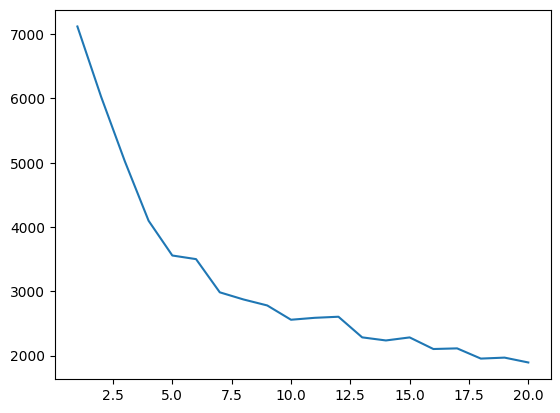

In [11]:
plt.plot(range(1,21) , wcss)

In [12]:
km1 = Kmeans(n_clusters=10 , num_of_iterations=10000)
clustering = km1.fit_predict(main_df)
print(clustering)

[0 9 0 9 0 9 0 9 3 9 3 9 3 9 0 9 0 9 0 9 0 9 3 9 3 9 0 6 0 9 3 9 3 9 3 9 0
 9 0 9 1 9 0 6 0 6 1 6 6 6 1 6 6 1 1 1 1 1 6 1 1 6 1 1 1 6 1 1 6 6 1 1 1 1
 1 6 1 6 6 1 1 6 1 1 6 1 1 6 6 1 1 8 1 8 8 8 1 8 1 8 8 1 1 8 1 8 1 1 1 1 1
 8 8 8 8 8 1 1 1 1 8 8 8 5 8 5 8 5 2 5 2 5 8 5 2 5 2 5 2 5 2 5 8 5 2 5 2 5
 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 7 2 5 2 5 2 7 2 7 2 5 2 7 2 7 2 7 2
 7 2 7 2 7 2 7 2 7 2 4 2 4 2 4]
